In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalishah092
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav


100%|██████████| 716M/716M [00:39<00:00, 18.8MB/s]


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drone-dataset-uav'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0306.jpg
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/foto05221.txt
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0246.jpg
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/scene00046.jpg
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_345.txt
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0269.txt
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_313.txt
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0016.jpg
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_082.jpg
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_905.txt
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/foto07367.jpg
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_497.jpg
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0086.jpg
/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_521.jpg
/content/drone-dataset-uav/d

In [4]:
from pathlib import Path
import os

DATA_DIR = Path("/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt")
print(len(os.listdir(DATA_DIR)))

2719


In [5]:
images = sorted(list(DATA_DIR.glob("*.jpg")))
print("Total images: ", len(images))
images[:5]

Total images:  1359


[PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0001.jpg'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0003.jpg'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0004.jpg'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0005.jpg'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0006.jpg')]

In [6]:
labels = sorted(list(DATA_DIR.glob("*.txt")))
print("Total labels: ", len(labels))
labels[:5]

Total labels:  1360


[PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0001.txt'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0003.txt'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0004.txt'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0005.txt'),
 PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0006.txt')]

In [7]:
set([label_path.stem for label_path in labels]) - set([image_path.stem for image_path in images])

{'classes'}

In [8]:
# Reading classes.txt
with open(DATA_DIR/"classes.txt", 'r') as f:
    print(f.read())

drone



In [9]:
# Removing classes.txt from labels list
FILE_TO_REMOVE = DATA_DIR / "classes.txt"
labels.remove(FILE_TO_REMOVE)

In [10]:
print("Images: ", len(images), " Labels: ", len(labels))

Images:  1359  Labels:  1359


In [11]:
DATA_DIR = Path("Data")
TRAIN_DIR = DATA_DIR / "train"
TEST_DIR = DATA_DIR / "test"
VALIDATION_DIR = DATA_DIR / "val"
os.makedirs(TRAIN_DIR/ "images")
os.makedirs(TRAIN_DIR/ "labels")
os.makedirs(TEST_DIR/ "images")
os.makedirs(TEST_DIR/ "labels")
os.makedirs(VALIDATION_DIR/ "images")
os.makedirs(VALIDATION_DIR/ "labels")

In [12]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(images, labels, test_size = 0.2)
X_val,X_test,y_val,y_test = train_test_split(X_temp, y_temp, test_size = 0.2)

In [13]:
print("Train image count: ", len(X_train))
print("Validation image count: ", len(X_val))
print("Test image count: ", len(X_test))

Train image count:  1087
Validation image count:  217
Test image count:  55


In [14]:
X_train[:5], y_train[:5]

([PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_330.jpg'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_804.jpg'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_089.jpg'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_240.jpg'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0268.jpg')],
 [PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_330.txt'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_804.txt'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_089.txt'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/pic_240.txt'),
  PosixPath('/content/drone-dataset-uav/drone_dataset_yolo/dataset_txt/0268.txt')])

In [15]:
import shutil
from tqdm.notebook import tqdm

def copyfiles(files, dest):
    print(f"Copying files to {dest}")
    for file in tqdm(files):
        shutil.copy(file, dest)

copyfiles(X_train, TRAIN_DIR/ "images")
copyfiles(y_train, TRAIN_DIR/ "labels")

copyfiles(X_test, TEST_DIR/ "images")
copyfiles(y_test, TEST_DIR/ "labels")

copyfiles(X_val, VALIDATION_DIR/ "images")
copyfiles(y_val, VALIDATION_DIR/ "labels")

Copying files to Data/train/images


  0%|          | 0/1087 [00:00<?, ?it/s]

Copying files to Data/train/labels


  0%|          | 0/1087 [00:00<?, ?it/s]

Copying files to Data/test/images


  0%|          | 0/55 [00:00<?, ?it/s]

Copying files to Data/test/labels


  0%|          | 0/55 [00:00<?, ?it/s]

Copying files to Data/val/images


  0%|          | 0/217 [00:00<?, ?it/s]

Copying files to Data/val/labels


  0%|          | 0/217 [00:00<?, ?it/s]

In [16]:
data_yaml = """
train: /content/Data/train/images
test: /content/Data/test/images
val: /content/Data/val/images

names:
  0: drone
"""

with open(DATA_DIR/"data.yaml", "w") as f:
    f.write(data_yaml)

In [17]:
os.listdir(DATA_DIR)

['train', 'data.yaml', 'val', 'test']

In [18]:
with open(DATA_DIR/"data.yaml", "r") as f:
    print(f.read())


train: /content/Data/train/images
test: /content/Data/test/images
val: /content/Data/val/images

names:
  0: drone



In [19]:
!pip uninstall wandb -y
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 61.7 MB/s eta 0:00:00


In [20]:
from ultralytics import YOLO

model = YOLO("yolov9c.pt")

100%|██████████| 49.4M/49.4M [00:00<00:00, 264MB/s]


In [21]:
model.info()

YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

In [22]:
# Training yolov9c model
results = model.train(
    data = DATA_DIR/"data.yaml",
    epochs = 20,
    imgsz = 640
)

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=Data/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 81.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 360MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/Data/train/labels... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:01<00:00, 588.96it/s]

train: WARNING ⚠️ /content/Data/train/images/pic_722.jpg: corrupt JPEG restored and saved
train: New cache created: /content/Data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Data/val/labels... 217 images, 0 backgrounds, 0 corrupt: 100%|██████████| 217/217 [00:00<00:00, 544.92it/s]

val: New cache created: /content/Data/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/68 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
       1/20      11.2G      1.619      2.134      1.835         42        640: 100%|██████████| 68/68 [00:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        217        237      0.104      0.198     0.0421     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20        11G      1.746      1.792      1.919         54        640: 100%|██████████| 68/68 [00:32<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        217        237     0.0179      0.165    0.00707    0.00201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      11.2G      1.806      1.814      1.962         41        640: 100%|██████████| 68/68 [00:32<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        217        237     0.0045      0.114    0.00147   0.000325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      11.4G      1.689      1.644      1.835         35        640: 100%|██████████| 68/68 [00:32<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        217        237      0.236      0.287      0.189      0.073



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      11.4G      1.645      1.599      1.808         34        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        217        237       0.35      0.456       0.28      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      11.4G      1.572      1.514      1.735         41        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        217        237      0.464      0.533      0.474      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      11.4G      1.535      1.392      1.686         38        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        217        237      0.838      0.603      0.701      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      11.4G      1.488      1.372      1.656         33        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        217        237      0.781      0.617      0.731      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      11.4G      1.467      1.298      1.649         41        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        217        237      0.781      0.603      0.738      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      11.4G      1.436      1.289      1.621         38        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        217        237      0.764      0.722       0.76      0.458


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      11.4G      1.412      1.116      1.731         15        640: 100%|██████████| 68/68 [00:32<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        217        237      0.785      0.747      0.796      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20        11G      1.384      1.039      1.678         18        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        217        237      0.805      0.662      0.775      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20        11G      1.324     0.9808      1.633         17        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        217        237      0.852      0.759      0.855      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20        11G      1.278     0.9497      1.596         15        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        217        237      0.832      0.776      0.862      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      11.4G       1.24      0.868      1.552         15        640: 100%|██████████| 68/68 [00:31<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        217        237      0.823      0.768      0.861      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20        11G      1.202     0.8421      1.515         17        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        217        237      0.844      0.827      0.871      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20        11G       1.15     0.7602      1.484         18        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        217        237      0.891      0.768      0.881      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      11.4G      1.125     0.7327      1.456         15        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        217        237      0.912      0.832       0.92      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      11.4G      1.097     0.7165      1.436         16        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        217        237      0.896      0.802      0.905      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      11.4G      1.066     0.6786      1.411         15        640: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        217        237      0.857      0.863      0.915      0.608



20 epochs completed in 0.203 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


                   all        217        237      0.857      0.862      0.915      0.607
Speed: 0.1ms preprocess, 6.3ms inference, 0.1ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


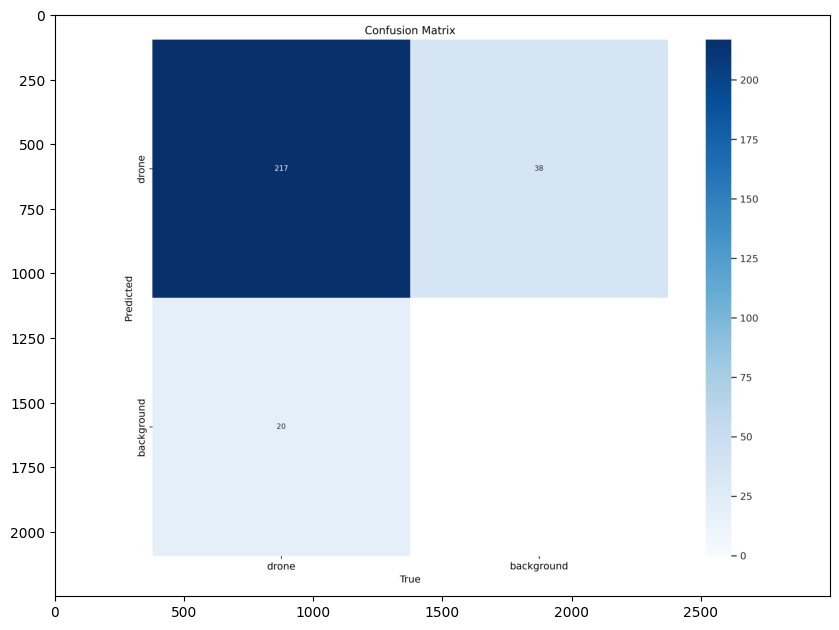

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

cnf = Image.open("/content/runs/detect/train/confusion_matrix.png")
plt.figure(figsize = (10,10))
plt.imshow(np.asarray(cnf))

In [24]:
def show_pred(labelled_path, pred_path):
    plt.figure(figsize = (40,20))
    labelled = Image.open(labelled_path)
    predicted = Image.open(pred_path)
    plt.subplot(121)
    plt.title("Labelled")
    plt.imshow(np.asarray(labelled))
    plt.axis("off")
    plt.subplot(122)
    plt.title("Predicted")
    plt.imshow(np.asarray(predicted))
    plt.axis("off")
    plt.tight_layout()

show_pred("/content/runs/detect/train/val_batch0_labels.jpg", "/content/runs/detect/train/val_batch0_pred.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [25]:
show_pred("/content/runs/detect/train/val_batch1_labels.jpg", "/content/runs/detect/train/val_batch1_pred.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [26]:
show_pred("/content/runs/detect/train/val_batch2_labels.jpg", "/content/runs/detect/train/val_batch2_pred.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
test_results = model.val(data=DATA_DIR/"data.yaml", split="test")

In [27]:
show_pred("/content/runs/detect/train/val_batch0_labels.jpg", "/content/runs/detect/train/val_batch0_pred.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [28]:
show_pred("/content/runs/detect/train/val_batch1_labels.jpg", "/content/runs/detect/train/val_batch1_pred.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [29]:
show_pred("/content/runs/detect/train/val_batch2_labels.jpg", "/content/runs/detect/train/val_batch2_pred.jpg")

Output hidden; open in https://colab.research.google.com to view.

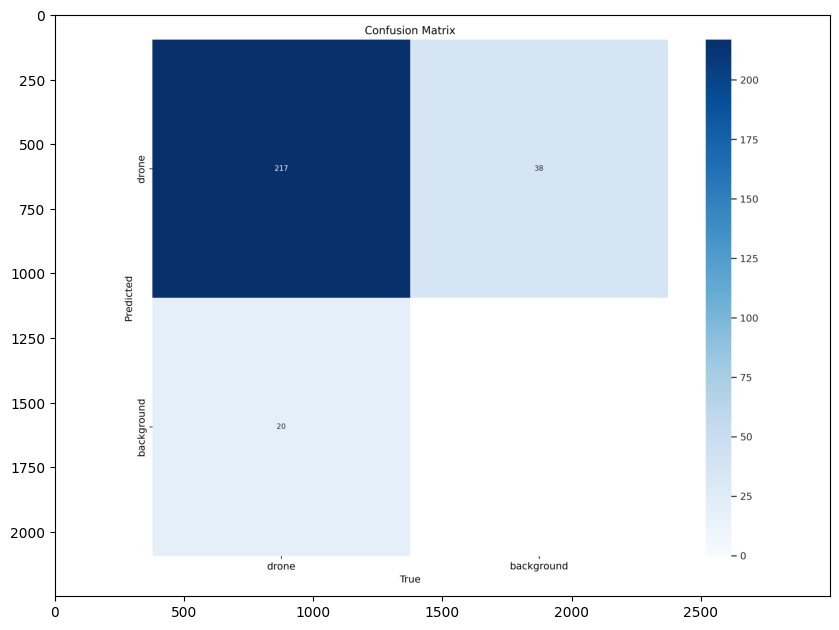

In [30]:
cnf = Image.open("/content/runs/detect/train/confusion_matrix.png")
plt.figure(figsize = (10,10))
plt.imshow(np.asarray(cnf))

In [34]:
from google.colab import files
upload = files.upload()

Saving Drone_Army_bloy3t.png to Drone_Army_bloy3t.png


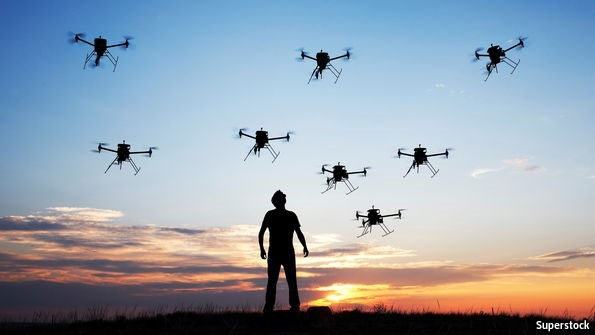

In [35]:
test_image = Image.open("Drone_Army_bloy3t.png")
test_image

In [36]:
test_image_results = model(test_image)[0]


0: 384x640 8 drones, 222.5ms
Speed: 2.1ms preprocess, 222.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


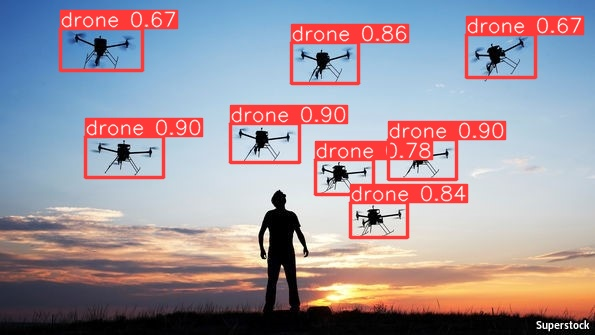

In [37]:
test_image_results.save("test_image_result.jpg")
Image.open("test_image_result.jpg")